In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p numpy,mlxtend,matplotlib,scikit-learn

Sebastian Raschka 
last updated: 2016-08-11 

CPython 3.5.1
IPython 5.0.0

numpy 1.11.1
mlxtend 0.4.2.dev0
matplotlib 1.5.1
scikit-learn 0.17.1


---

This Jupyter notebook contains the code to create the data visualizations for the article "Model evaluation, model selection, and algorithm selection in machine learning - Part II" at http://sebastianraschka.com/blog/2016/model-evaluation-selection-part2.html.

---

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import sklearn

# Resampling and Distributions

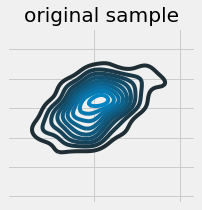

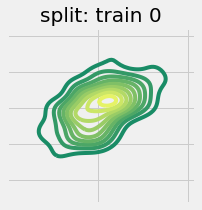

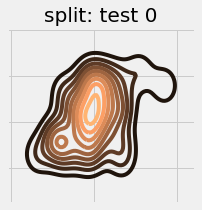

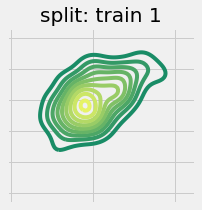

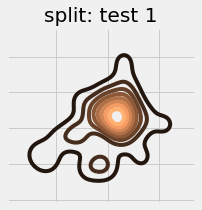

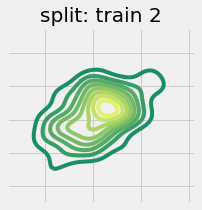

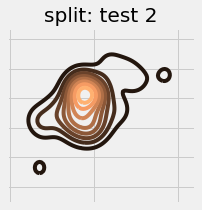

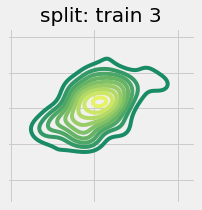

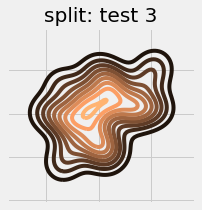

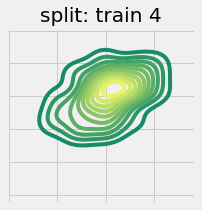

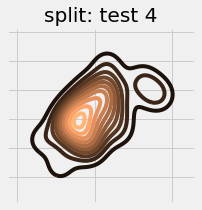

In [15]:
import seaborn.apionly as sns
from sklearn.model_selection import train_test_split

rng = np.random.RandomState(12345)

gauss = rng.multivariate_normal(mean=np.array([0., 0.]), 
                                cov=np.array([[2., 1.], 
                                              [1., 2.]]), 
                                size=100)

with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111)
    sns.kdeplot(gauss[:, 0], gauss[:, 1])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("original sample")
    #plt.savefig('figures/gauss_small_orig.svg')
    plt.show()
    

seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

with plt.style.context(('fivethirtyeight')):
    for i in range(5):
        X_train, X_test = train_test_split(gauss,
                                           test_size=0.3, 
                                           random_state=i)
    
        fig = plt.figure(figsize=(3, 3))
        ax = fig.add_subplot(111)
        sns.kdeplot(X_train[:, 0], X_train[:, 1], cmap='summer')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.title("split: train %d" % i)

        #plt.savefig('figures/gauss_%d_small_train.svg' % i)
        plt.show()
        
        fig = plt.figure(figsize=(3, 3))
        ax = fig.add_subplot(111)
        sns.kdeplot(X_test[:, 0], X_test[:, 1], cmap='copper')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.title("split: test %d" % i)
        #plt.savefig('figures/gauss_%d_small_test.svg' % i)
        plt.show()

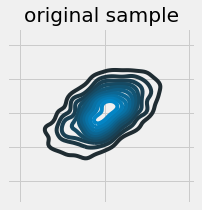

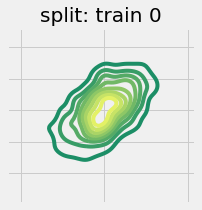

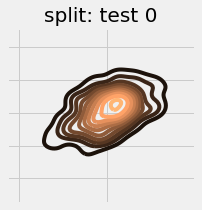

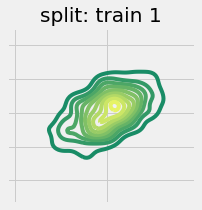

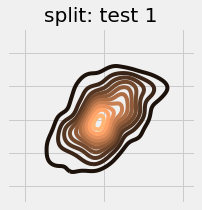

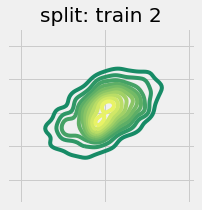

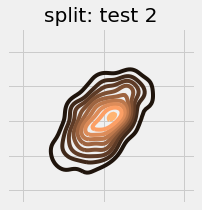

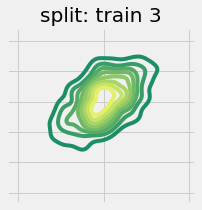

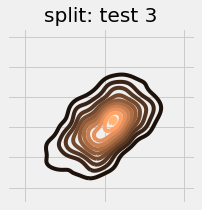

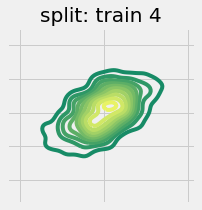

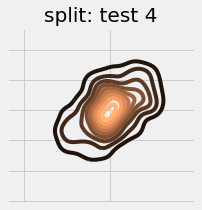

In [16]:
import seaborn.apionly as sns
from sklearn.model_selection import train_test_split

rng = np.random.RandomState(12345)

gauss = rng.multivariate_normal(mean=np.array([0., 0.]), 
                                cov=np.array([[2., 1.], 
                                              [1., 2.]]), 
                                size=1000)

with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111)
    sns.kdeplot(gauss[:, 0], gauss[:, 1])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("original sample")
    #plt.savefig('figures/gauss_large_orig.svg')
    plt.show()
    

seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

with plt.style.context(('fivethirtyeight')):
    for i in range(5):
        X_train, X_test = train_test_split(gauss,
                                           test_size=0.3, 
                                           random_state=i)
    
        fig = plt.figure(figsize=(3, 3))
        ax = fig.add_subplot(111)
        sns.kdeplot(X_train[:, 0], X_train[:, 1], cmap='summer')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.title("split: train %d" % i)
        #plt.savefig('figures/gauss_%d_large_train.svg' % i)
        plt.show()
        
        fig = plt.figure(figsize=(3, 3))
        ax = fig.add_subplot(111)
        sns.kdeplot(X_test[:, 0], X_test[:, 1], cmap='copper')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.title("split: test %d" % i)

        #plt.savefig('figures/gauss_%d_large_test.svg' % i)
        plt.show()

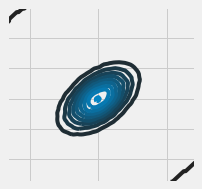

In [12]:
rng = np.random.RandomState(12345)

gauss = rng.multivariate_normal(mean=np.array([0., 0.]), 
                                cov=np.array([[2., 1.], 
                                              [1., 2.]]), 
                                size=500000)

with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111)
    sns.kdeplot(gauss[:, 0], gauss[:, 1])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #plt.savefig('figures/gauss_pop.svg')
    plt.show()

# Holdout method and repeated sampling

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data[:, :], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=1,
                                                    stratify=y)

clf_1 = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform', 
                             algorithm='kd_tree', 
                             leaf_size=30, 
                             p=2, 
                             metric='minkowski', 
                             metric_params=None, 
                             n_jobs=1)

0.9541333333333333


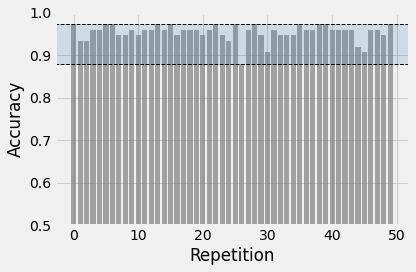

In [19]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.5, 
                                                        random_state=i,
                                                        stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)

pred_2 = np.asarray(pred_2)
print(pred_2.mean())

with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.0])
    plt.tight_layout()
    #plt.savefig('figures/model-eval-iris_0.svg')
    plt.show()

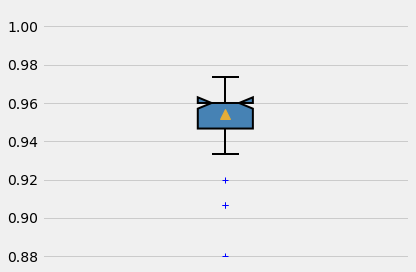

In [20]:
with plt.style.context(('fivethirtyeight')):
    bp = plt.boxplot(pred_2,
                notch=True,
                sym='bs',
                showmeans=True,
                patch_artist=True,     
                vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black', linestyle='-', linewidth=2)
    plt.setp(bp['fliers'], color='black', marker='+')
    plt.setp(bp['medians'], color='black', linewidth=2)
    plt.setp(bp['means'], c='gray', markersize=10)
    plt.setp(bp['caps'], linewidth=2)
    plt.setp(bp['boxes'], facecolor='steelblue', linewidth=2)
    plt.ylim([pred_2.min()-0.001, 1.01])
    plt.xticks([])
    plt.tight_layout()
    #plt.savefig('figures/model-eval-iris_1.svg')
    plt.show()

0.9613333333333334


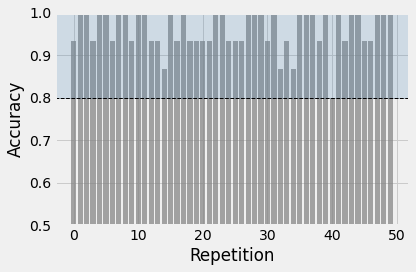

In [21]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.1, 
                                                        random_state=i,
                                                        stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)
    
pred_2 = np.asarray(pred_2)
print(pred_2.mean())

with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.0)
    plt.tight_layout()
    #plt.savefig('figures/model-eval-iris_0_2.svg')
    plt.show()

## Pessimistic Bias in Holdout

In [19]:
from mlxtend.data import mnist_data

X2, y2 = mnist_data()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                    test_size=0.3, 
                                                    random_state=12,
                                                    stratify=y2)
y_train2

array([8, 8, 7, ..., 6, 9, 8])

In [20]:
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression(penalty='l2', 
                           dual=False, 
                           tol=0.0001, 
                           C=0.000001, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           class_weight=None, 
                           random_state=12, 
                           solver='lbfgs', 
                           max_iter=100, 
                           multi_class='multinomial', 
                           verbose=0, 
                           warm_start=False, 
                           n_jobs=1)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)

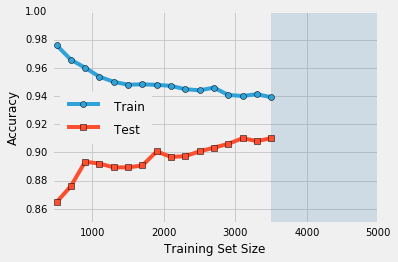

In [21]:
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0], 
                X_train2.shape[0] + X_test2.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-mnist_0.svg')

##  Bootstrap

In [30]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

rng = np.random.RandomState(seed=12345)

iris = load_iris()
X, y = iris.data, iris.target

clf = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform', 
                             algorithm='kd_tree', 
                             leaf_size=30, 
                             p=2, 
                             metric='minkowski', 
                             metric_params=None, 
                             n_jobs=1)


idx = np.arange(y.shape[0])

accuracies = []

for i in range(200):
    
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    
    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_test_X, boot_test_y = X[test_idx], y[test_idx]
    
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

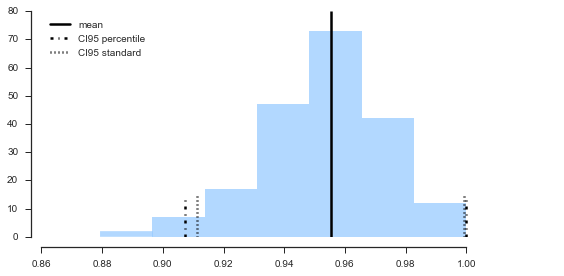

In [31]:
import seaborn as sns

sns.set_style("ticks")

mean = np.mean(accuracies)

#se = np.sqrt( (1. / (100-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
#ci = 1.984 * se

se = np.sqrt( (1. / (200-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
ci = 1.97 * se

lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(mean, [0], 80, lw=2.5, linestyle='-', label='mean')
#ax.vlines(med, [0], 60, lw=2.5, linestyle='--', label='median')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label='CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')

ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label='CI95 standard')
ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')


ax.hist(accuracies, bins=7,
        color='#0080ff', edgecolor="none", 
        alpha=0.3)
plt.legend(loc='upper left')
sns.despine(offset=10, trim=True)
plt.xlim([0.86, 1.03])
plt.tight_layout()
plt.savefig('figures/bootstrap-histo-1.svg')

plt.show()

In [6]:
from mlxtend.data import mnist_data
from sklearn.linear_model import LogisticRegression

rng = np.random.RandomState(seed=12345)

X, y = mnist_data()

clf = LogisticRegression(penalty='l2', 
                           dual=False, 
                           tol=0.0001, 
                           C=0.000001, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           class_weight=None, 
                           random_state=12, 
                           solver='lbfgs', 
                           max_iter=100, 
                           multi_class='multinomial', 
                           verbose=0, 
                           warm_start=False, 
                           n_jobs=1)


idx = np.arange(y.shape[0])

accuracies = []

for i in range(200):
    
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    
    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_test_X, boot_test_y = X[test_idx], y[test_idx]
    
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

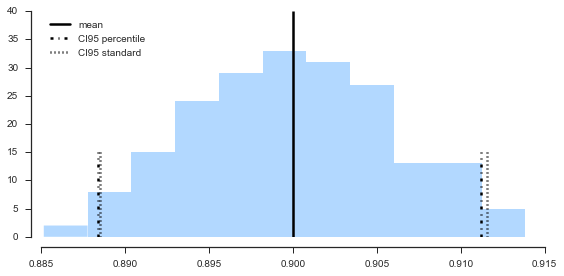

In [29]:
import seaborn as sns

sns.set_style("ticks")

mean = np.mean(accuracies)

#se = np.sqrt( (1. / (100-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
#ci = 1.984 * se

se = np.sqrt( (1. / (200-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
ci = 1.97 * se

lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(mean, [0], 40, lw=2.5, linestyle='-', label='mean')
#ax.vlines(med, [0], 60, lw=2.5, linestyle='--', label='median')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label='CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')

ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label='CI95 standard')
ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')


ax.hist(accuracies, bins=11,
        color='#0080ff', edgecolor="none", 
        alpha=0.3)
plt.legend(loc='upper left')

plt.xlim([0.885, 0.915])
sns.despine(offset=10, trim=True)
plt.tight_layout()

plt.savefig('figures/bootstrap-histo-2.svg')

plt.show()

## K-fold and standard deviation (1-standard error method)

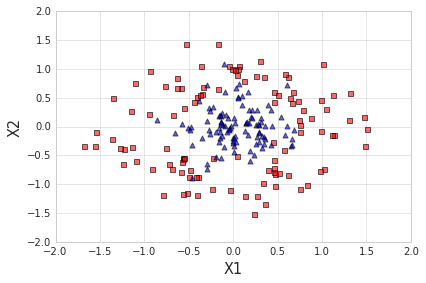

In [110]:
from sklearn.datasets import make_circles


with plt.style.context(('seaborn-whitegrid')):
    X, y = make_circles(n_samples=300, random_state=1, noise=0.275, factor=0.2)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3, 
                                                        random_state=12345,
                                                        stratify=y)

    plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
                marker='s', color='red', edgecolor='k', alpha=0.6, s=25)
    plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
                marker='^', color='blue', edgecolor='k', alpha=0.6, s=25)
    plt.xlabel('X1', fontsize=14.5)
    plt.ylabel('X2', fontsize=14.5)
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_1.svg')
    plt.show()

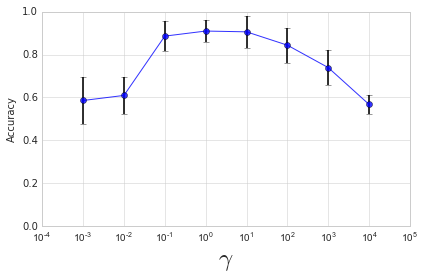

In [99]:
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold

params = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
cv_acc, cv_std, cv_stderr = [], [], []


cv = StratifiedKFold(y=y_train, n_folds=10, shuffle=True, random_state=1)

for c in params:

    clf = SVC(C=10.0, 
              kernel='rbf', 
              degree=1, 
              gamma=c, 
              coef0=0.0, 
              shrinking=True, 
              probability=False, 
              tol=0.001, 
              cache_size=200, 
              class_weight=None, 
              verbose=False, 
              max_iter=-1, 
              decision_function_shape=None, 
              random_state=0)

    
    all_acc = []
    for train_index, valid_index in cv:
        pred = clf.fit(X_train[train_index], y_train[train_index])\
               .predict(X_train[valid_index])
        acc = np.mean(y_train[valid_index] == pred)
        all_acc.append(acc)

    all_acc = np.array(all_acc)
    y_pred_cv10_mean = all_acc.mean()
    y_pred_cv10_std = all_acc.std()
    y_pred_cv10_stderr = y_pred_cv10_std / np.sqrt(10)

    cv_acc.append(y_pred_cv10_mean) 
    cv_std.append(y_pred_cv10_std)
    cv_stderr.append(y_pred_cv10_stderr)
    

with plt.style.context(('seaborn-whitegrid')):
    
    ax = plt.subplot(111)
    ax.set_xscale('log')
    ax.errorbar(params, cv_acc, yerr=cv_std, marker='o', alpha=0.8, ecolor='black', elinewidth=2)

    plt.ylim([0.0, 1.0])
    plt.xlim([0.0001, 100000.0])
    plt.xlabel('$\gamma$', fontsize=25)
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_2.svg')
    plt.show()

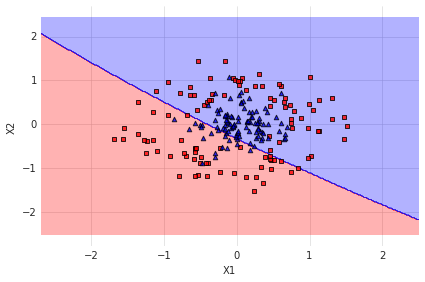

In [102]:
from mlxtend.evaluate import plot_decision_regions

clf = SVC(C=10.0, 
          kernel='rbf', 
          degree=1, 
          gamma=0.001, 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape=None, 
          random_state=123)

clf.fit(X_train, y_train)

with plt.style.context(('seaborn-whitegrid')):
    plot_decision_regions(X_train, 
                          y_train, 
                          clf=clf, 
                          res=0.02, 
                          legend=None)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_3.svg')
    plt.show()

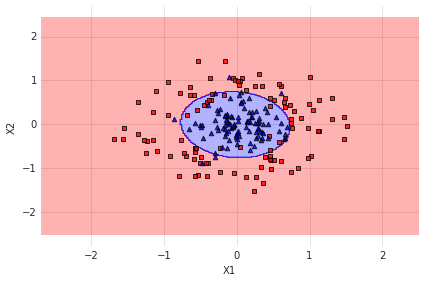

In [103]:
clf = SVC(C=10.0, 
          kernel='rbf', 
          degree=1, 
          gamma=0.1, 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape=None, 
          random_state=123)

clf.fit(X_train, y_train)
with plt.style.context(('seaborn-whitegrid')):
    plot_decision_regions(X_train, 
                          y_train, 
                          clf=clf, 
                          res=0.02, 
                          legend=None)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_4.svg')
    plt.show()

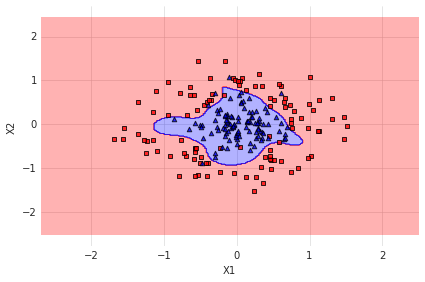

In [105]:
clf = SVC(C=10.0, 
          kernel='rbf', 
          degree=1, 
          gamma=10, 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape=None, 
          random_state=123)

clf.fit(X_train, y_train)
with plt.style.context(('seaborn-whitegrid')):
    plot_decision_regions(X_train, 
                          y_train, 
                          clf=clf, 
                          res=0.02, 
                          legend=None)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_5.svg')
    plt.show()

## Repeated k-fold

In [94]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:5]

params = [0.01, 0.1, 1.0, 10.0, 100.0]
cv_acc, cv_std, cv_stderr = [], [], []

params_by_seed = []
for seed in seeds:
    cv = StratifiedKFold(y=y_train, n_folds=10, 
                         shuffle=True, random_state=seed)
    acc_by_param = []
    for c in params:
        
        clf = SVC(C=1.0, 
                  kernel='rbf', 
                  degree=1, 
                  gamma=c, 
                  coef0=0.0, 
                  shrinking=True, 
                  probability=False, 
                  tol=0.001, 
                  cache_size=200, 
                  class_weight=None, 
                  verbose=False, 
                  max_iter=-1, 
                  decision_function_shape=None, 
                  random_state=12345)


        all_acc = []
        for train_index, valid_index in cv:
            pred = clf.fit(X_train[train_index], y_train[train_index])\
                   .predict(X_train[valid_index])
            acc = np.mean(y_train[valid_index] == pred)
            all_acc.append(acc)

        all_acc = np.array(all_acc)
        acc_by_param.append(all_acc.mean())
    print(acc_by_param)
    params_by_seed.append(acc_by_param)

[0.64318181818181819, 0.77272727272727271, 0.89181818181818184, 0.92500000000000004, 0.84409090909090911]
[0.61954545454545451, 0.77318181818181819, 0.9081818181818182, 0.93227272727272725, 0.86181818181818193]
[0.63727272727272732, 0.79045454545454541, 0.89454545454545453, 0.92818181818181811, 0.86681818181818182]
[0.64772727272727271, 0.7804545454545454, 0.89681818181818185, 0.92363636363636359, 0.87181818181818183]
[0.65136363636363637, 0.77136363636363636, 0.89954545454545465, 0.93454545454545457, 0.86863636363636376]


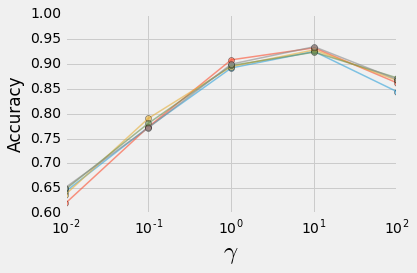

In [95]:
with plt.style.context(('fivethirtyeight')):
    ax = plt.subplot(111)
    ax.set_xscale('log')
    
    for cv_acc in params_by_seed:
        ax.errorbar(params, cv_acc, linewidth=1.5, alpha=0.6, marker='o')

    plt.ylim([0.6, 1.0])
    plt.xlabel('$\gamma$', fontsize=25)
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_7.svg')
    plt.show()

In [96]:
y_train.shape

(210,)

[0.65238095238095239, 0.75714285714285712, 0.89523809523809528, 0.92380952380952375, 0.84761904761904761]
[0.63809523809523816, 0.75238095238095237, 0.90000000000000002, 0.93809523809523809, 0.86666666666666681]
[0.60476190476190472, 0.77142857142857135, 0.90000000000000002, 0.92857142857142849, 0.8571428571428571]
[0.67142857142857149, 0.76190476190476186, 0.88571428571428579, 0.90952380952380951, 0.84761904761904761]
[0.65238095238095239, 0.75238095238095237, 0.89047619047619053, 0.92380952380952386, 0.85238095238095235]


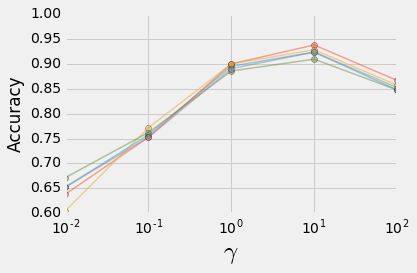

In [97]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:5]

params = [0.01, 0.1, 1.0, 10.0, 100.0]
cv_acc, cv_std, cv_stderr = [], [], []

params_by_seed = []
for seed in seeds:
    cv = StratifiedKFold(y=y_train, n_folds=5, 
                         shuffle=True, random_state=seed)
    acc_by_param = []
    for c in params:
        
        clf = SVC(C=1.0, 
                  kernel='rbf', 
                  degree=1, 
                  gamma=c, 
                  coef0=0.0, 
                  shrinking=True, 
                  probability=False, 
                  tol=0.001, 
                  cache_size=200, 
                  class_weight=None, 
                  verbose=False, 
                  max_iter=-1, 
                  decision_function_shape=None, 
                  random_state=12345)


        all_acc = []
        for train_index, valid_index in cv:
            pred = clf.fit(X_train[train_index], y_train[train_index])\
                   .predict(X_train[valid_index])
            acc = np.mean(y_train[valid_index] == pred)
            all_acc.append(acc)

        all_acc = np.array(all_acc)
        acc_by_param.append(all_acc.mean())
    print(acc_by_param)
    params_by_seed.append(acc_by_param)
    
with plt.style.context(('fivethirtyeight')):
    ax = plt.subplot(111)
    ax.set_xscale('log')
    
    for cv_acc in params_by_seed:
        ax.errorbar(params, cv_acc, linewidth=1.5, alpha=0.5, marker='o')

    plt.ylim([0.6, 1.0])
    plt.xlabel('$\gamma$', fontsize=25)
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_7_2.svg')
    plt.show()

[0.65277777777777779, 0.78333333333333321, 0.89861111111111103, 0.93194444444444458, 0.85277777777777775]
[0.64722222222222225, 0.79305555555555562, 0.8916666666666665, 0.92638888888888871, 0.86249999999999993]
[0.6527777777777779, 0.78194444444444444, 0.88194444444444431, 0.92499999999999993, 0.85555555555555551]
[0.62916666666666676, 0.77222222222222214, 0.90000000000000002, 0.92361111111111105, 0.84861111111111109]
[0.63611111111111107, 0.77083333333333337, 0.89166666666666672, 0.94027777777777777, 0.87361111111111112]


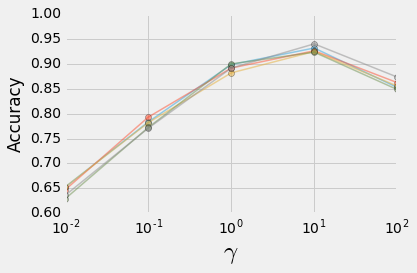

In [98]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:5]

params = [0.01, 0.1, 1.0, 10.0, 100.0]
cv_acc, cv_std, cv_stderr = [], [], []

params_by_seed = []
for seed in seeds:
    cv = StratifiedKFold(y=y_train, n_folds=30, 
                         shuffle=True, random_state=seed)
    acc_by_param = []
    for c in params:
        
        clf = SVC(C=1.0, 
                  kernel='rbf', 
                  degree=1, 
                  gamma=c, 
                  coef0=0.0, 
                  shrinking=True, 
                  probability=False, 
                  tol=0.001, 
                  cache_size=200, 
                  class_weight=None, 
                  verbose=False, 
                  max_iter=-1, 
                  decision_function_shape=None, 
                  random_state=12345)


        all_acc = []
        for train_index, valid_index in cv:
            pred = clf.fit(X_train[train_index], y_train[train_index])\
                   .predict(X_train[valid_index])
            acc = np.mean(y_train[valid_index] == pred)
            all_acc.append(acc)

        all_acc = np.array(all_acc)
        acc_by_param.append(all_acc.mean())
    print(acc_by_param)
    params_by_seed.append(acc_by_param)
    
with plt.style.context(('fivethirtyeight')):
    ax = plt.subplot(111)
    ax.set_xscale('log')
    
    for cv_acc in params_by_seed:
        ax.errorbar(params, cv_acc, linewidth=1.5, alpha=0.5, marker='o')

    plt.ylim([0.6, 1.0])
    plt.xlabel('$\gamma$', fontsize=25)
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_7_3.svg')
    plt.show()

## Bootstrap

In [3]:
from matplotlib import rc
rc('text', usetex=True)

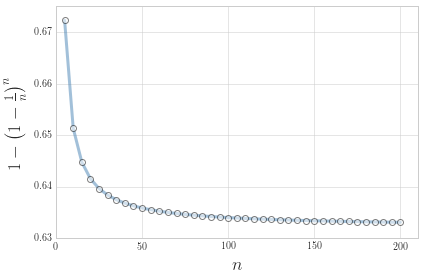

In [15]:
vs = []
for n in range(5, 201, 5):
    v = 1 - (1. - 1./n)**n
    vs.append(v)

with plt.style.context(('seaborn-whitegrid')):    
    plt.plot([n for n in range(5, 201, 5)], vs, marker='o', 
            markersize=6, color='steelblue', linewidth=3, 
            alpha=0.5, markerfacecolor='white',
            markeredgewidth=1)
plt.xlabel('$n$', fontsize=18)
plt.ylabel('$1 - \\bigg(1 - \\frac{1}{n}\\bigg)^n$', fontsize=18)
plt.xlim([0, 210])
plt.tight_layout()
plt.savefig('./figures/bootstrap_prob.svg')
plt.show()

In [16]:
1 - np.e**(-1)

0.6321205588285577